In [36]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import ttest_ind
import scipy
import pandas as pd
import matplotlib
import netCDF4 as nc
from datetime import date
import climapy.clikapy.clikapy as clikapy

In [119]:
trmm=xr.open_dataset('../ppt_data/trmm_monthly.nc',decode_times=False)
trmm_day=xr.open_dataset('../ppt_data/trmm_daily_1998_2016.nc')
print(trmm)
ti,nlat,nlon=trmm.PPT.shape
trmm['time']=pd.date_range('1997-01-01', freq='MS', periods=ti)
print(trmm)
print(trmm.PPT.shape)
trmmmth=trmm.PPT[:228,:,:].data.reshape((-1,12,nlat,nlon))

<xarray.Dataset>
Dimensions:  (lat: 400, lon: 1440, time: 234)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * lat      (lat) float32 -49.875 -49.625 -49.375 -49.125 -48.875 -48.625 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
Data variables:
    PPT      (time, lat, lon) float64 0.5119 0.5777 0.4229 0.3213 0.419 ...
Attributes:
    title:    monthly averaged precipitation combined microwave-IR with gauge...
<xarray.Dataset>
Dimensions:  (lat: 400, lon: 1440, time: 234)
Coordinates:
  * time     (time) datetime64[ns] 1997-01-01 1997-02-01 1997-03-01 ...
  * lat      (lat) float32 -49.875 -49.625 -49.375 -49.125 -48.875 -48.625 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
Data variables:
    PPT      (time, lat, lon) float64 0.5119 0.5777 0.4229 0.3213 0.419 ...
Attributes:
    title:    monthly averaged precipitation combined microwave-IR with gauge...
(234, 400, 1440

In [82]:
landmsk=xr.open_dataset('../ppt_data/landmask_d01_trmm.nc').LANDMASK.data
landmsk[landmsk>0]=1
landmsk[landmsk==0]=np.nan
seamsk=xr.open_dataset('../ppt_data/landmask_d01_trmm.nc').LANDMASK.data
seamsk[seamsk>0]=np.nan
seamsk[seamsk==0]=1

In [126]:
def plot_pdf(x,label,ax,clr='k'):
    '''
    plots the PDf of a 1d array of data.
    Might have to mess around with x.data
    if there are errors.
    '''
    num_bins = 100
#     the histogram of the data
#     n, bins, patches = ax.hist(x, num_bins)
#     add a 'best fit' line
    kde=scipy.stats.gaussian_kde(x)
    t_range = np.linspace(np.min(x),np.max(x),num_bins)
    ax.plot(t_range,kde(t_range),clr,label=label)
    ax.legend()

def plt_monsoon_pdf(ax,data1,lnmsk,semsk,season_name):
    #plots pdf for the season that it is fed
    ax.set_title(season_name)
#     x=np.nanmean(data1.PPT,axis=(1,2))
#     plot_pdf(x,'trmm',ax,'b')
    ax.set_xlim([0,30])
    x3=np.nanmean(data1.PPT*lnmsk,axis=(1,2))
#     x3=(data1.PPT*landmsk).data.flatten()
    x3 = x3[~np.isnan(x3)]
    plot_pdf(x3,'land',ax,'b--')
    x5=np.mean(data1.PPT*semsk,axis=(1,2))
#     x5=(data1.PPT*seamsk).data.flatten()
    x5 = x5[~np.isnan(x5)]
    plot_pdf(x5,'sea',ax,'b:')
def plot_monsoon_pdfs(data_s1,lnmsk,semsk,index):
    #plots pdf for each season
    fig, ax = plt.subplots(2,2,sharex=True)
    s1_monsoon=clikapy.monsoon(data_s1)
    axisgrids=[ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
    for ii in range(0,4):
        plt_monsoon_pdf(axisgrids[ii],s1_monsoon[ii],lnmsk,semsk,my_xticks[ii])
        if(ii>1):
            axisgrids[ii].set_xlabel('Precipitation mm/day')
        if((ii+1)%2):
            axisgrids[ii].set_ylabel('Probability density')
    ax[0,0].text(0.0, 1.05, index, transform=ax[0,0].transAxes, 
                size=10, weight='bold')
        

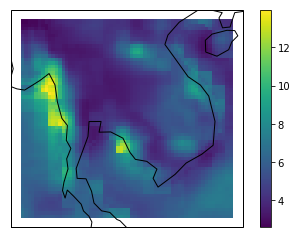

<xarray.DataArray 'PPT' ()>
array(5.679952241656034)


In [6]:
#d02 domain lat:6.288 - 20.822, lon:95.290 - 110.536
# trmm.lat[225:284].data
#trmm.lon[1100:1163].data
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(trmm.lon[1100:1163],trmm.lat[225:284],np.mean(trmm.PPT[:,225:284,1100:1163],axis=0))
plt.colorbar()
ax=plt.gca()
ax.coastlines()
plt.show()
print(np.mean(trmm.PPT[:,225:284,1100:1163]))



(19, 12, 400, 1440)


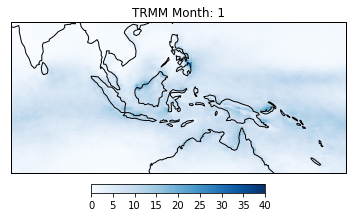

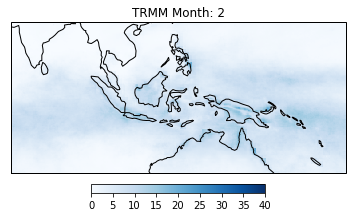

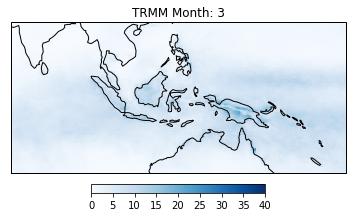

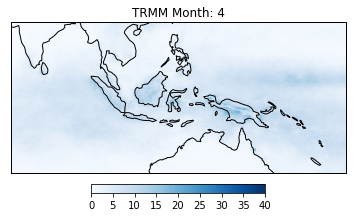

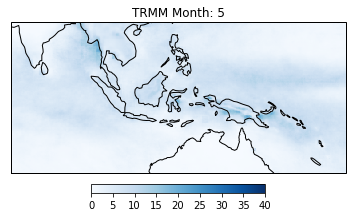

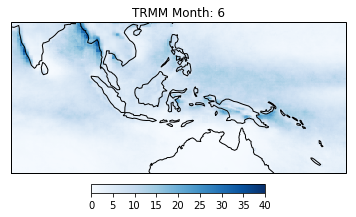

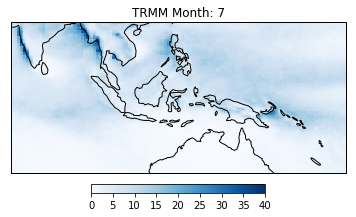

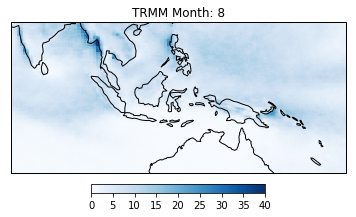

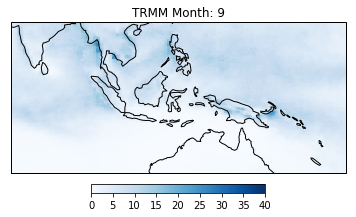

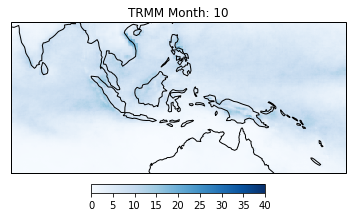

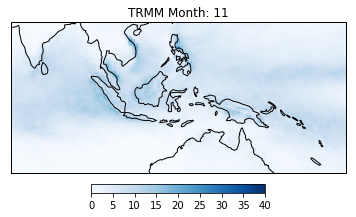

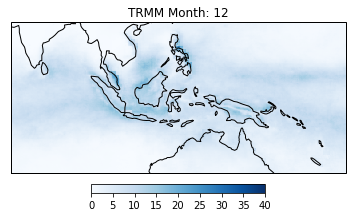

In [7]:
print(trmmmth.shape)
trmmyr=np.mean(trmmmth,axis=0)
minn=0
maxx=40
cmap = plt.get_cmap('Blues')
for tt in range (0,12):
    plt.figure(tt)
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(trmm.lon[1000:-20], trmm.lat[100:-110],trmmyr[tt,100:-110,1000:-20],vmin=minn,vmax=maxx,cmap=cmap)
    ax1.set_title('TRMM Month: '+str(tt+1))
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=minn, vmax=maxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05, orientation='horizontal')
    ax1.coastlines()
plt.show()

(12, 85, 169)


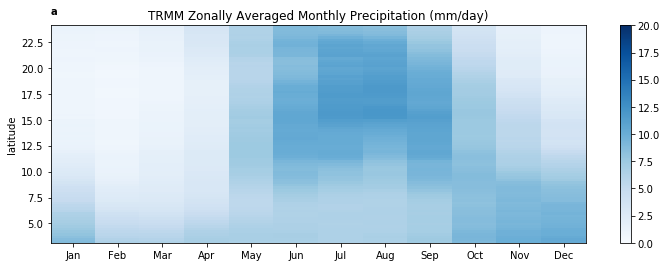

In [121]:
plt.rcParams["figure.figsize"] = 12,4
trmmyr=np.mean(trmmmth,axis=0)
trmm_xr=xr.DataArray(trmmyr,dims=('mth','lat','lon'),coords={'mth':np.arange(1,13),'lat':trmm.lat,'lon':trmm.lon})
np.shape(trmm_xr)
#d01
latmin_d1=2.92
latmax_d1=24.18
lonmin_d1=81.9 #80.66
lonmax_d1=124.17 #125.42
trmmyr_cut=trmm_xr.sel(lat=slice(latmin_d1, latmax_d1),lon=slice(lonmin_d1,lonmax_d1))
print(np.shape(trmmyr_cut))

lats_mth=np.mean(trmmyr_cut,axis=2)
plt.figure(1)
my_xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_pos=[1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]
plt.pcolormesh(np.arange(1,14),trmmyr_cut.lat,lats_mth.T,vmin=0,vmax=20,cmap='Blues')
plt.xticks(x_pos,my_xticks)
plt.ylabel('latitude')
plt.title('TRMM Zonally Averaged Monthly Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()
ax=plt.gca()
ax.text(0.0, 1.05, 'a', transform=ax.transAxes, 
                size=10, weight='bold')
plt.show()

TRMM seasonal PDF

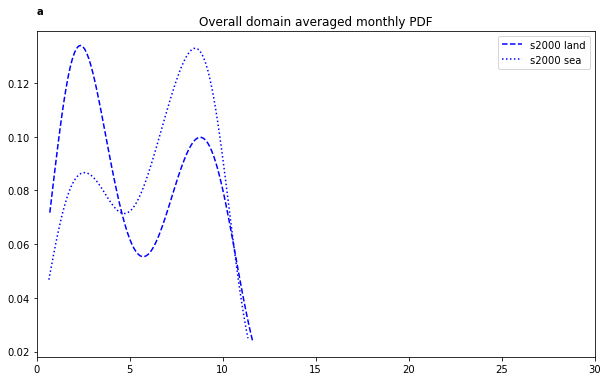

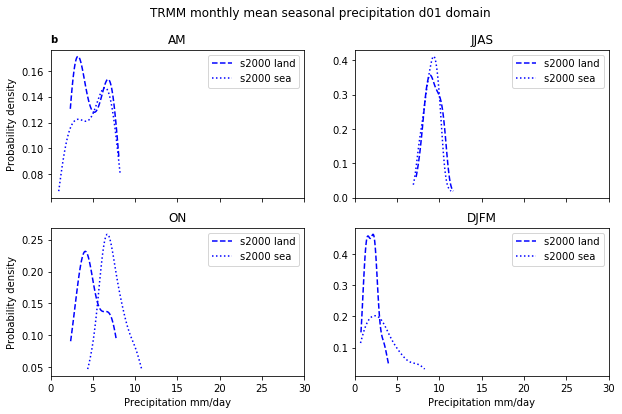

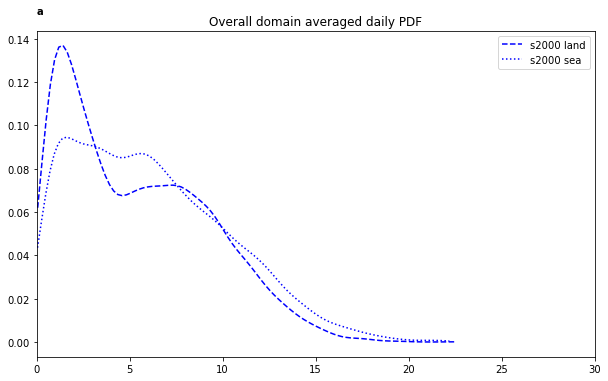

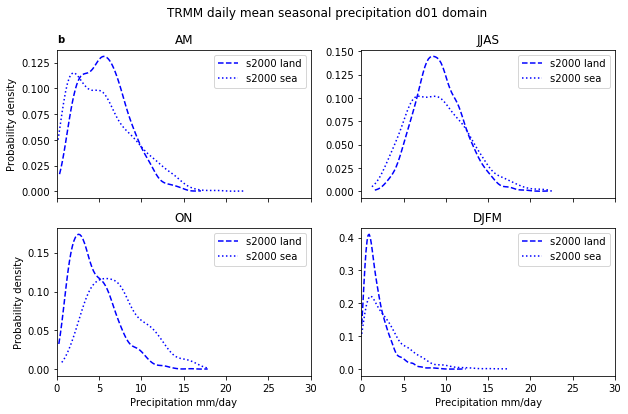

In [120]:
trmm_d01=trmm.sel(lat=slice(latmin_d1, latmax_d1),lon=slice(lonmin_d1,lonmax_d1))
trmm_day_d01=trmm_day.sel(lat=slice(latmin_d1, latmax_d1),lon=slice(lonmin_d1,lonmax_d1))

plt.rcParams["figure.figsize"] = 10,6
plt.figure(1)
fig,ax=plt.subplots()
plt_monsoon_pdf(ax,trmm_d01,1,1,'Overall domain averaged monthly PDF')
ax.text(0.0, 1.05, 'a', transform=ax.transAxes, 
            size=10, weight='bold')
my_xticks=['AM','JJAS','ON','DJFM']
plt.figure(2)
plot_monsoon_pdfs(trmm_d01,1,1,'b')
plt.suptitle('TRMM monthly mean seasonal precipitation d01 domain')

plt.figure(3)
fig,ax=plt.subplots()
plt_monsoon_pdf(ax,trmm_day_d01,1,1,'Overall domain averaged daily PDF')
ax.text(0.0, 1.05, 'a', transform=ax.transAxes, 
            size=10, weight='bold')
my_xticks=['AM','JJAS','ON','DJFM']
plt.figure(4)
plot_monsoon_pdfs(trmm_day_d01,1,1,'b')
plt.suptitle('TRMM daily mean seasonal precipitation d01 domain')

plt.show()

/home/likkhian/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


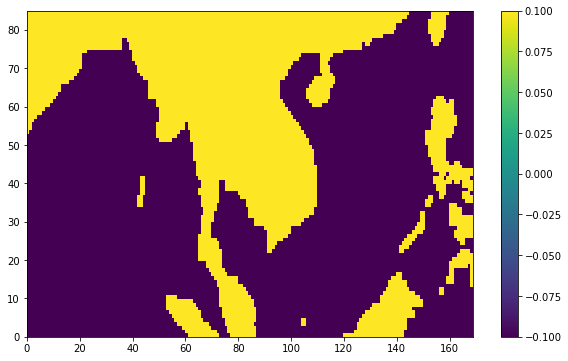

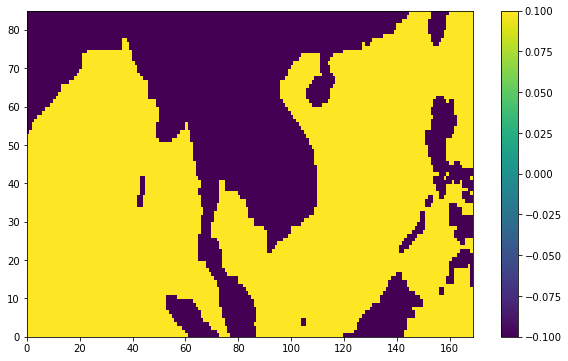

In [90]:
plt.figure(1)
plt.pcolormesh(landmsk)
plt.colorbar()
plt.figure(2)
plt.pcolormesh(seamsk)
plt.colorbar()
plt.show()

In [124]:
chirps=xr.open_dataset('../ppt_data/chirps-v2.0.monthly.nc')
print(chirps)

ti,nlat,nlon=chirps.precip.shape
chirps2=np.empty(chirps.precip.shape)
print(chirps.precip.shape)
chirps2[-1,:,:]=chirps.precip[-1,:,:]/31
for ii in range(1,ti):
    daysInMth=(chirps.coords['time'][ii]-chirps.coords['time'][ii-1]).data/np.timedelta64(1, 'D')
    chirps2[ii-1,:,:]=chirps.precip[ii-1,:,:]/daysInMth
chirpsmth=chirps2[:432,:,:].reshape((-1,12,nlat,nlon))
print(np.shape(chirpsmth))

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 439)
Coordinates:
  * latitude   (latitude) float32 -49.975 -49.925 -49.875 -49.825 -49.775 ...
  * longitude  (longitude) float32 -179.975 -179.925 -179.875 -179.825 ...
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 1981-03-01 ...
Data variables:
    precip     (time, latitude, longitude) float64 nan nan nan nan nan nan ...
Attributes:
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2017-08-16
    creator_name:      Pete Peterson
    creator_email:     pete@geog.ucsb.edu
    institution:       Climate Hazards Group.  University of California at Sa...
    documentation:     http://pubs.usgs.gov/ds/832/
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    ac

5.50458698101


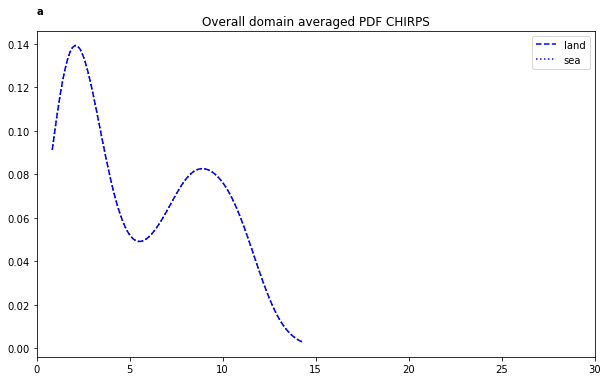

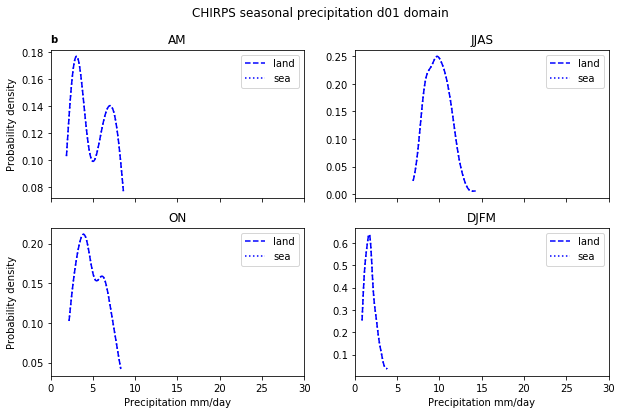

In [129]:
chirps_d01=chirps.sel(latitude=slice(latmin_d1, latmax_d1),longitude=slice(lonmin_d1,lonmax_d1))
chirps_d01['PPT']=chirps_d01['precip']/30
print(np.nanmean(chirps_d01.PPT))
plt.rcParams["figure.figsize"] = 10,6
plt.figure(1)
fig,ax=plt.subplots()
plt_monsoon_pdf(ax,chirps_d01,1,1,'Overall domain averaged PDF CHIRPS')
ax.text(0.0, 1.05, 'a', transform=ax.transAxes, 
            size=10, weight='bold')
my_xticks=['AM','JJAS','ON','DJFM']
plt.figure(2)
plot_monsoon_pdfs(chirps_d01,1,1,'b')
plt.suptitle('CHIRPS seasonal precipitation d01 domain')
plt.show()

In [23]:
#d02 domain lat:6.288 - 20.822, lon:95.290 - 110.536
chirpsd02=chirpsmth.precip.sel(latitude=slice(6.288, 20.822),longitude=slice(95.290,110.536))
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(chirpsd02.longitude,chirpsd02.latitude,np.mean(chirpsd02,axis=0),vmin=0,vmax=20)
plt.colorbar()
ax=plt.gca()
ax.coastlines()
plt.show()
print(np.nanmean(chirpsd02))
print(np.shape(chirpsd02))

AttributeError: 'numpy.ndarray' object has no attribute 'precip'

In [ ]:
#d02 domain lat:6.288 - 20.822, lon:95.290 - 110.536
print(np.shape(chirps))
print(chirps.latitude[500:1400].data)
print(chirps.longitude[5000:7000].data)

/home/likkhian/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


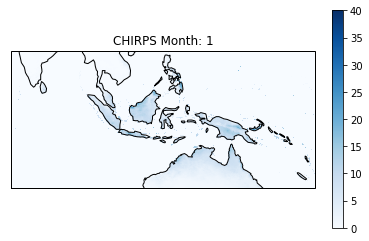

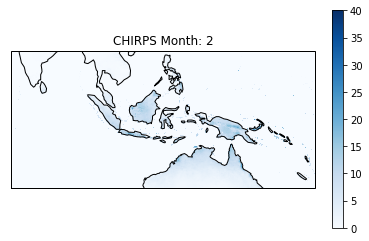

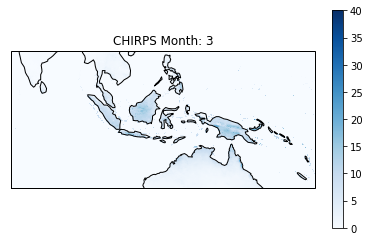

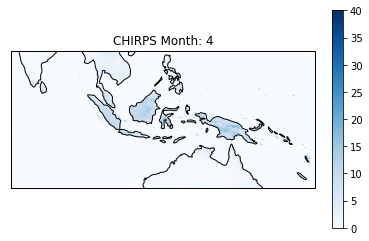

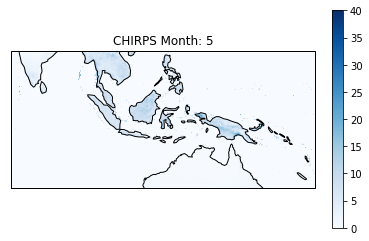

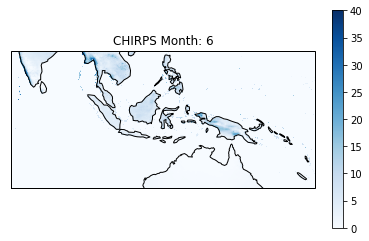

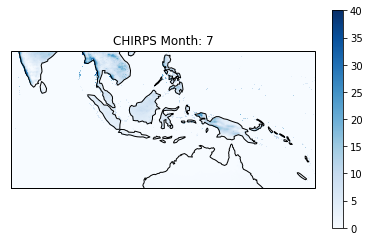

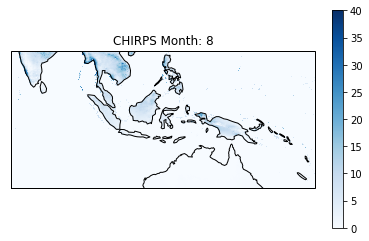

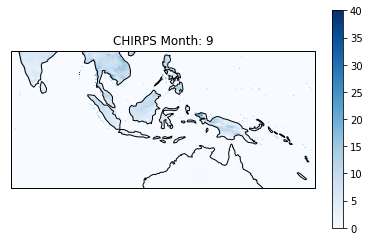

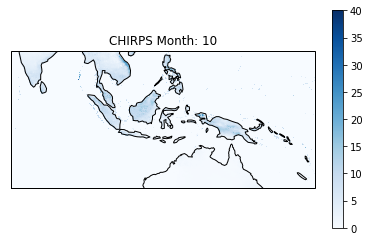

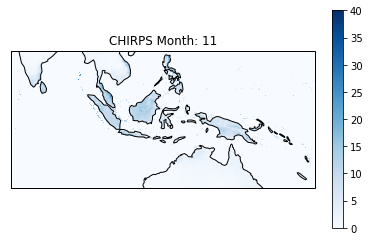

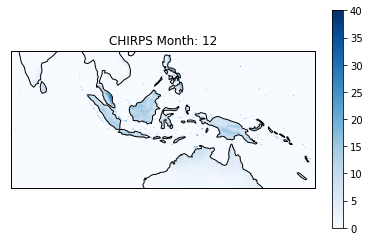

In [8]:
minn=0
maxx=40
cmap = plt.get_cmap('Blues')
for tt in range (0,12):
    plt.figure(tt)
    ax2=plt.subplot(projection=ccrs.PlateCarree())
    ax2.pcolor(chirps.longitude[5000:-200], chirps.latitude[500:-600],chirpsyr[tt,500:-600,5000:-200],cmap=cmap,vmin=minn,vmax=maxx)
    ax2.set_title('CHIRPS Month: '+str(tt+1))
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=minn, vmax=maxx))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05)
    ax2.coastlines()
plt.show()

In [ ]:
print((chirps.coords['time'][-1]-chirps.coords['time'][-2]).data/np.timedelta64(1, 'D'))
print(chirps.coords['time'][-1])

## SA_OBS data

In [113]:
saobs=xr.open_dataset('../ppt_data/rr_0.25deg_reg_v1.0_saca.nc')
saobs=saobs.sel(latitude=slice(latmin_d1, latmax_d1),longitude=slice(lonmin_d1,lonmax_d1))
saobs['PPT']=saobs['rr']
print(np.nanmean(saobs.PPT))

4.71148106017


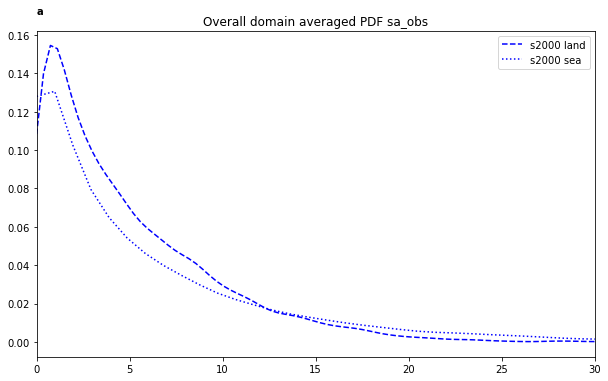

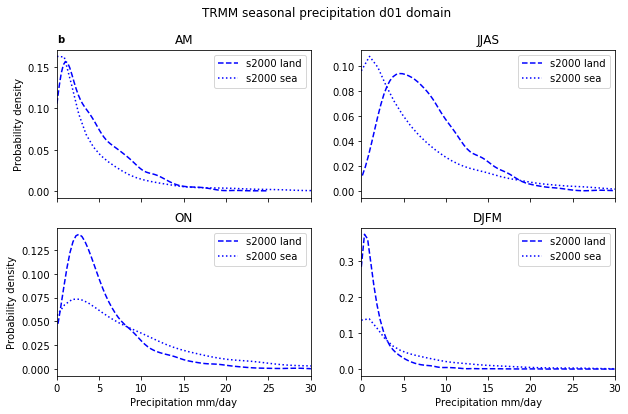

In [117]:
plt.rcParams["figure.figsize"] = 10,6
plt.figure(1)
fig,ax=plt.subplots()
plt_monsoon_pdf(ax,saobs,1,1,'Overall domain averaged PDF sa_obs')
ax.text(0.0, 1.05, 'a', transform=ax.transAxes, 
            size=10, weight='bold')
my_xticks=['AM','JJAS','ON','DJFM']
plt.figure(2)
plot_monsoon_pdfs(saobs,1,1,'b')
plt.suptitle('TRMM seasonal precipitation d01 domain')
plt.show()